|Name:|Tufan Kundu|
|--|--|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Digital Assessment:| 1|

## Q1. Using McCulloch Pitts model discussed in the class, write a Python code to implement the OR and AND Boolean functions. Also, plot the boundary input points and the linear classifier that we get in that case.


### OR GATE

In [2]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
def or_func(x1,x2):
    x_or = []
    for i in range(len(x1)):
        if x1[i] == 0 and x2[i] == 0:
            x_or.append(0)
        else:
            x_or.append(1)
    return x_or
x_or = or_func(x1,x2)
g_or = [x1[i]+x2[i] for i in range(len(x1))]


In [3]:
y_or = []
for i in range(len(x1)):
    if g_or[i]>=1:
        y_or.append(1)
    else:
        y_or.append(0)

In [4]:
y_or

[0, 1, 1, 1]

### Plotting the boundary points and the linear classifier for OR Gate

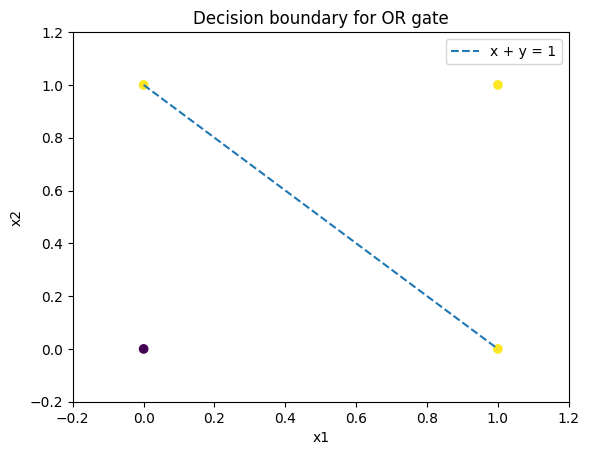

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
plt.scatter(x1,x2, c = y_or)
x = np.linspace(0, 1, 100)
y = 1 - x
plt.plot(x, y, label='x + y = 1', linestyle = '--')
plt.title("Decision boundary for OR gate")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### AND GATE

In [8]:
x1 = [0,0,1,1]
x2 = [0,1,0,1]
def and_func(x1,x2):
    x_and = []
    for i in range(len(x1)):
        if x1[i] == 1 and x2[i] == 1:
            x_and.append(1)
        else:
            x_and.append(0)
    return x_and
x_and = and_func(x1,x2)
g_and = [x1[i]+x2[i] for i in range(len(x1))]


In [9]:
y_and = []
for i in range(len(x1)):
    if g_and[i]>=2:
        y_and.append(1)
    else:
        y_and.append(0)

In [10]:
y_and

[0, 0, 0, 1]

### Plotting the boundary points and the linear classifier for AND Gate

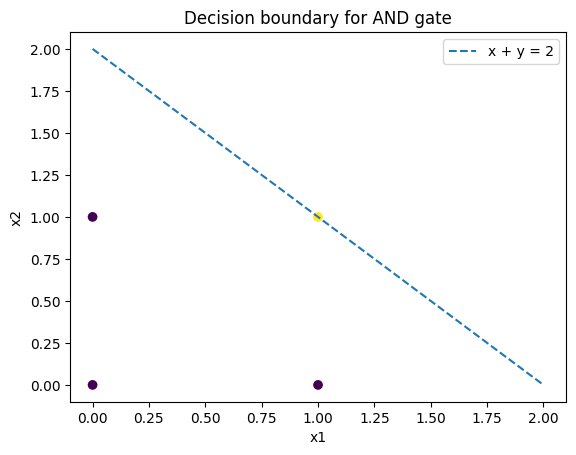

In [11]:
plt.scatter(x1,x2, c = y_and)
x = np.linspace(0, 2, 100)
y = 2 - x
plt.plot(x, y, label='x + y = 2', linestyle = '--')
plt.title("Decision boundary for AND gate")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Q2. Write a Python code to implement the Perceptron Learning Algorithm to implement OR, AND, NAND, NOR logic Gates and report the weights and bias. Also, print the inputs and outputs after training the weights properly. Further plot the linear classifier that you have obtained as well. Note that here the input vectors x should be extended with a x0 term, which is taken as 1. Assume we have two inputs x1 and x2 so the x vector would be [1, x1, x2]

In [13]:
# Inputs
x1_input = np.array([0, 0, 1, 1])
x2_input = np.array([0, 1, 0, 1])
x_bias = np.ones_like(x1_input)
X = np.vstack([x_bias, x1_input, x2_input]).T

# Target
Y = {
    "AND": np.array([0, 0, 0, 1]),
    "OR": np.array([0, 1, 1, 1]),
    "NAND": np.array([1, 1, 1, 0]),
    "NOR": np.array([1, 0, 0, 0])
}



In [14]:
# Perceptron algorithm
def perceptron(X, y, lr=1, max_epochs=100):
    w = np.random.rand(X.shape[1]) - 0.5
    # Initializing weights in range [-0.5, 0.5) to allow both positive and negative starting values for better learning dynamics
    for epoch in range(max_epochs):
        error = False
        for i in range(len(y)):
            y_pred = 1 if np.dot(w, X[i]) >= 0 else 0
            if y_pred != y[i]:
                w += lr * (y[i] - y_pred) * X[i]
                error = True
        if not error:
            break
    return w

In [15]:
# Plotting function
def plot_decision_boundary(w, X, y, title):
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k', s=100)
    x1 = np.linspace(-0.2, 1.2, 100)
    x2 = (-w[0] - w[1] * x1) / w[2]
    plt.plot(x1, x2, '--k', label='Decision Boundary')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)
    plt.legend()
    plt.xlim(-0.2, 1.2)
    plt.ylim(-0.2, 1.2)
    plt.show()


Training for AND Gate
Weights learned: [-2.06831019  1.58109973  0.97767163]
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


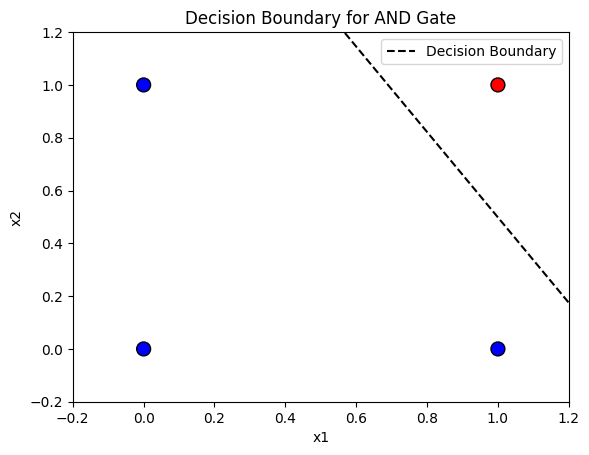


Training for OR Gate
Weights learned: [-0.45461047  0.59556886  1.08896874]
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


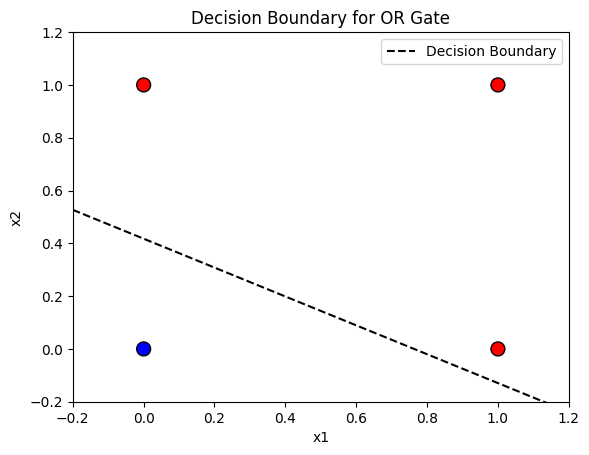


Training for NAND Gate
Weights learned: [ 2.52410536 -1.74422048 -1.52238958]
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 0


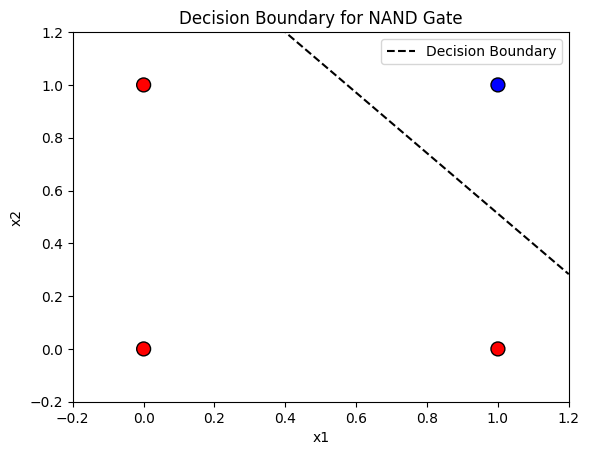


Training for NOR Gate
Weights learned: [ 0.75991229 -0.94416477 -1.37060917]
Input: [0 0], Output: 1
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 0


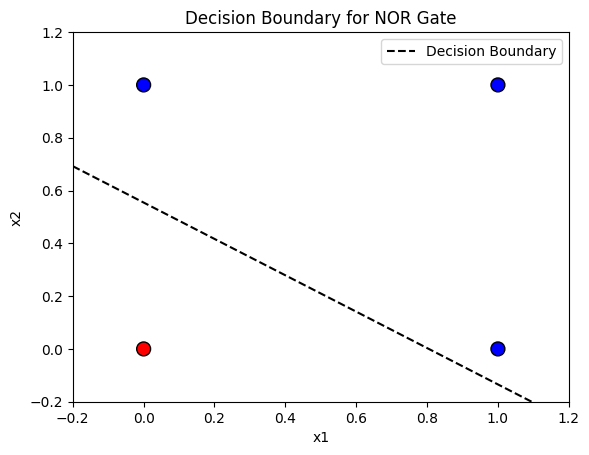

In [16]:
# Training and plot for each gate
for gate, y_true in Y.items():
    print(f"\nTraining for {gate} Gate")
    w_final = perceptron(X, y_true)
    print(f"Weights learned: {w_final}")
    outputs = []
    for i in range(len(X)):
        output = 1 if np.dot(w_final, X[i]) >= 0 else 0
        outputs.append(output)
        print(f"Input: {X[i][1:]}, Output: {output}")
        
    plot_decision_boundary(w_final, X, y_true, f"Decision Boundary for {gate} Gate")


## Q3. Next we will see how we can implement an XOR function using inbuilt tools.

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

## Building MLP model
model = Sequential()
model.add(Dense(4,input_dim = 2, activation = 'sigmoid')) 
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

model.fit(x,y, epochs = 2000, verbose = 1)
print("XOR Function-- predictions:")
predictions = model.predict(x)
print(predictions)

c:\Users\TUFAN\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 865ms/step - accuracy: 0.5000 - loss: 0.7700
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7692
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7685
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5000 - loss: 0.7677
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7670
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.7663
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7655
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7648
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7641
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7634
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.7627
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step


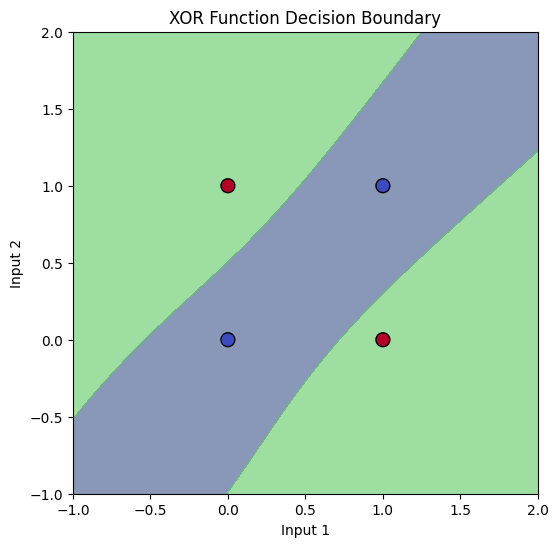

In [21]:
# Plot decision boundary for XOR
xx, yy = np.meshgrid(np.linspace(-1, 2, 200),
                     np.linspace(-1, 2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# Predictions on the grid
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,6))
# Contour plot
plt.contourf(xx, yy, Z,levels=[0,0.5,1], cmap="viridis", alpha=0.6)

# Scatter plot of original points
plt.scatter(x[:,0], x[:,1], c=y.ravel(), edgecolors='k', cmap="coolwarm", s=100)
plt.title("XOR Function Decision Boundary")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()


## Q4- Next we will try to recall the logistic regression model that you have seen  in your Machine learning Course. With the given dataset ’liver patient.csv’ we will first fit  a logistic regression model. Then we can see how a deep learning model framework can be  used to create a model that does the same job.

### importing the necessary libraries

In [22]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Loading the dataset

In [24]:
df = pd.read_csv("liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Dropping the unnecessary gender column

In [26]:
df.drop('Gender', axis = 1 , inplace = True)

### Min max scaling

In [28]:
MM = MinMaxScaler()
X = MM.fit_transform(df)

### Splitting data intro train test split

In [30]:
x = X[:,:9]
y = X[:,9]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [31]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
print(f"Accuracy score:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy score:71.79%


### Using Keras

In [33]:
import keras 
from keras.models import Sequential 
from keras.layers import Dense
import warnings 
warnings.filterwarnings('ignore')

In [34]:
model = Sequential()
model.add(Dense(1,activation = 'sigmoid', input_shape = (9,)))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
from keras.optimizers import SGD
model.compile(loss = 'BinaryCrossentropy', optimizer='SGD', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=50, epochs=500, 
                    verbose=1, validation_data=(x_test, y_test))


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7040 - loss: 0.6067 - val_accuracy: 0.7094 - val_loss: 0.6116
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7264 - loss: 0.5955 - val_accuracy: 0.7094 - val_loss: 0.6112
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7370 - loss: 0.5840 - val_accuracy: 0.7094 - val_loss: 0.6109
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6979 - loss: 0.6109 - val_accuracy: 0.7094 - val_loss: 0.6105
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7169 - loss: 0.6004 - val_accuracy: 0.7094 - val_loss: 0.6103
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7401 - loss: 0.5842 - val_accuracy: 0.7094 - val_loss: 0.6101
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7265 - loss: 0.5897 - val_accuracy: 0.7094 - val_loss: 0.6098
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7164 - loss: 0.5975 - val_accuracy: 0.7094 

In [36]:
# Training accuracy over epochs
train_accuracies = history.history['accuracy']

# Validation accuracy over epochs
val_accuracies = history.history['val_accuracy']

# Final validation accuracy
print(f"Final Validation Accuracy: {val_accuracies[-1] * 100:.2f}%")


Final Validation Accuracy: 70.94%


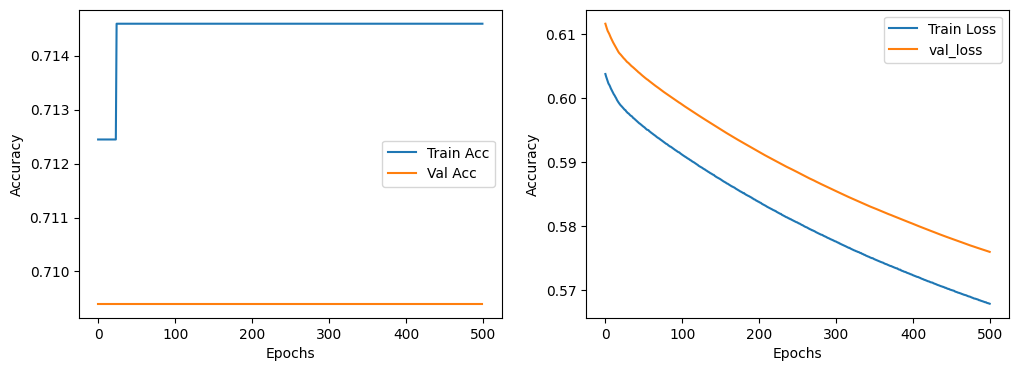

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Adding 2 neurons in the output layer

In [39]:
### This step does one hot encoding for the output variable 
y_train_2 = keras.utils.to_categorical(y_train,2)
y_test_2 = keras.utils.to_categorical(y_test,2)

In [40]:
model = Sequential()
model.add(Dense(2,activation = 'softmax', input_shape = (9,)))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 2)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20 (80.00 B)

 Trainable params: 20 (80.00 B)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(loss = "CategoricalCrossentropy", optimizer='SGD', metrics = ['accuracy'])
history = model.fit(x_train, y_train_2, batch_size=50, epochs=500, 
                    verbose=1, validation_data=(x_test, y_test_2))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7309 - loss: 0.6042 - val_accuracy: 0.7094 - val_loss: 0.6260
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7090 - loss: 0.6350 - val_accuracy: 0.7094 - val_loss: 0.6238
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7271 - loss: 0.6069 - val_accuracy: 0.7094 - val_loss: 0.6220
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7260 - loss: 0.6108 - val_accuracy: 0.7094 - val_loss: 0.6204
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7123 - loss: 0.6244 - val_accuracy: 0.7094 - val_loss: 0.6189
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7175 - loss: 0.6168 - val_accuracy: 0.7094 - val_loss: 0.6174
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7133 - loss: 0.6259 - val_accuracy: 0.7094 - val_loss: 0.6165
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7221 - loss: 0.6159 - val_accuracy: 0.7094 

In [42]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Validation Accuracy: 70.94%


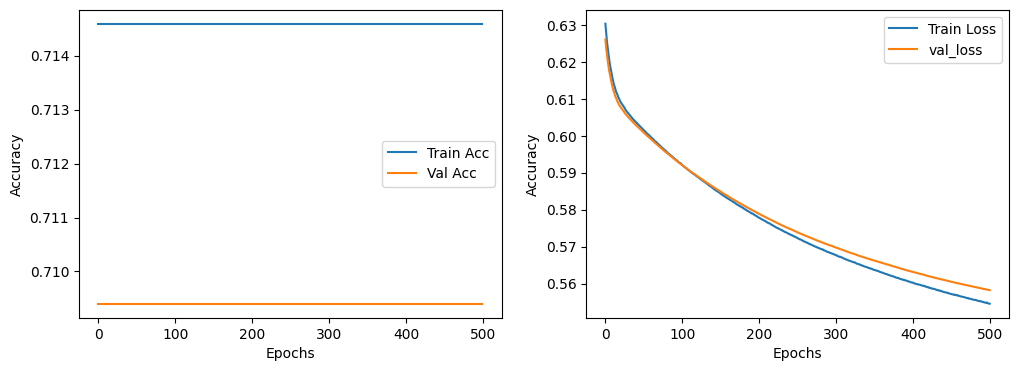

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model with 9 neurons in the input layer, 10 neurons in the hidden layer and 2 neurons in the output layer

In [45]:
model = Sequential()
model.add(Dense(10, activation = 'sigmoid', input_shape = (9,)))
model.add(Dense(2,activation = 'sigmoid'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (488.00 B)

 Trainable params: 122 (488.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train_2, batch_size=50, epochs = 500, verbose=1, validation_data=(x_test,y_test_2))

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3015 - loss: 0.9649 - val_accuracy: 0.2906 - val_loss: 0.9474
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2979 - loss: 0.9337 - val_accuracy: 0.2906 - val_loss: 0.9157
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2867 - loss: 0.9105 - val_accuracy: 0.2906 - val_loss: 0.8866
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2965 - loss: 0.8772 - val_accuracy: 0.2906 - val_loss: 0.8601
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2794 - loss: 0.8600 - val_accuracy: 0.2906 - val_loss: 0.8369
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2905 - loss: 0.8310 - val_accuracy: 0.2906 - val_loss: 0.8150
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2740 - loss: 0.8175 - val_accuracy: 0.2906 - val_loss: 0.7951
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2753 - loss: 0.7955 - val_accuracy: 0.2906 - 

In [48]:
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {final_val_accuracy * 100:.2f}%")


Final Validation Accuracy: 70.94%


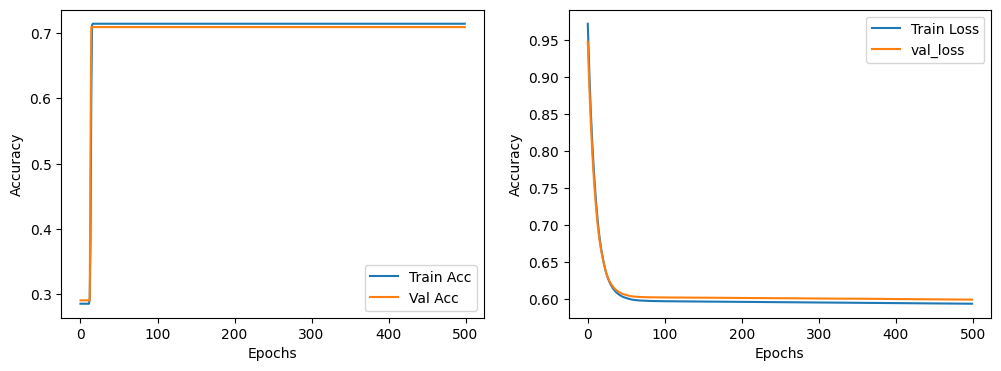

In [49]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Question:5 There are many activation function we can use in out process of creating models. Appart from the sigmoid activation function one can also use activation function like relu (which is defined as relu(z) = max(0,z)) in the intermediate layer neurons. Try to create a model which gives a better accuracy than the above ones you had by altering the architecture and activation functions. You can also try to change the batch size in your training process.

### Using ReLU activation, batch_size = 25 and 1000 epochs

In [51]:
model = Sequential()
model.add(Dense(10, activation = 'relu',input_shape = (9,)))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train, batch_size=25, epochs = 1000, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7318 - loss: 0.6115 - val_accuracy: 0.7094 - val_loss: 0.6148
Epoch 2/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6833 - loss: 0.6267 - val_accuracy: 0.7094 - val_loss: 0.6084
Epoch 3/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 0.6025 - val_accuracy: 0.7094 - val_loss: 0.6041
Epoch 4/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7183 - loss: 0.5968 - val_accuracy: 0.7094 - val_loss: 0.6009
Epoch 5/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6863 - loss: 0.6147 - val_accuracy: 0.7094 - val_loss: 0.5984
Epoch 6/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7183 - loss: 0.5940 - val_accuracy: 0.7094 - val_loss: 0.5966
Epoch 7/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7119 - loss: 0.5961 - val_accuracy: 0.7094 - val_loss: 0.5953
Epoch 8/1000
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7267 - loss: 0.5872 - val_accuracy: 0

In [52]:

val_acc = history.history['val_accuracy'][-1]
print(f"Final accuracy using Relu activation function {val_acc*100:.2f}%")

Final accuracy using Relu activation function 75.21%


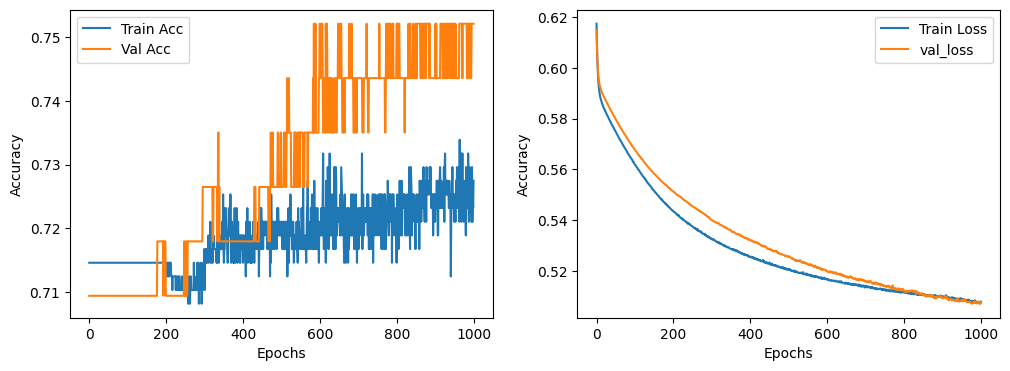

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Using tanh activation, batch_size = 40 and 1000 epochs

In [54]:
model = Sequential()
model.add(Dense(10, activation = 'tanh',input_shape = (9,)))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()
model.compile(loss = "BinaryCrossentropy", optimizer = "SGD", metrics = ["accuracy"])
history = model.fit(x_train,y_train, batch_size=40, epochs = 1000, verbose=1, validation_data=(x_test,y_test))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111 (444.00 B)

 Trainable params: 111 (444.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6572 - loss: 0.6544 - val_accuracy: 0.7094 - val_loss: 0.6326
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6849 - loss: 0.6404 - val_accuracy: 0.7094 - val_loss: 0.6275
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6854 - loss: 0.6371 - val_accuracy: 0.7094 - val_loss: 0.6235
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7127 - loss: 0.6131 - val_accuracy: 0.7094 - val_loss: 0.6203
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6971 - loss: 0.6217 - val_accuracy: 0.7094 - val_loss: 0.6177
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7238 - loss: 0.6069 - val_accuracy: 0.7094 - val_loss: 0.6156
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7077 - loss: 0.6231 - val_accuracy: 0.7094 - val_loss: 0.6138
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7123 - loss: 0.6137 - val_accuracy:

In [55]:

val_acc = history.history['val_accuracy'][-1]
print(f"Final accuracy using tanh activation function {val_acc*100:.2f}%")

Final accuracy using tanh activation function 71.79%


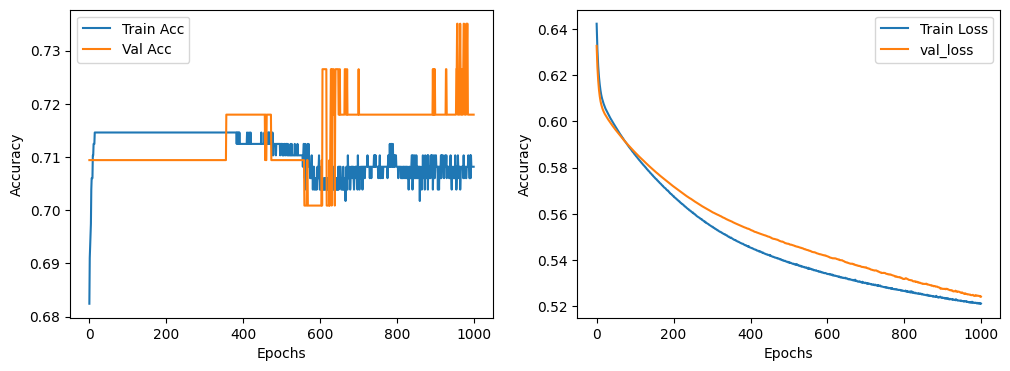

In [56]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

|activation function| batch size| accuracy|
|-|-|-|
|sigmoid| 50| 70.94%|
|relu |25 |75.21%|
|tanh| 40| 71.79%|

### Question:6 Next let us try a multi class classification problem where we will work with the mnist dataset. It constains 70000 handwritten images of digits from 0 to 9. So its a 10 class classification problem. Lets try to create a model that can do the classification task.

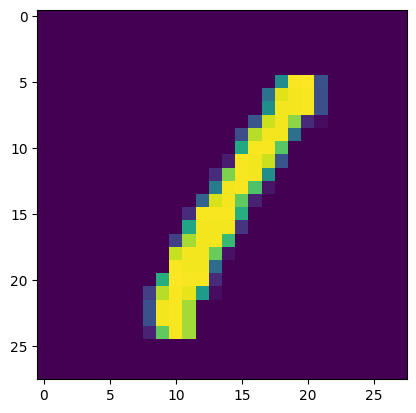

In [58]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10
(x_train,y_train), (x_test,y_test) = mnist.load_data()
plt.imshow(x_train[3])
plt.show()

### Converting all the values in the array in the range of 0 to 1 for better training by the neural network.

In [61]:
x_train = x_train/255
x_test = x_test/255


### Making the artificial neural network

In [63]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [66]:
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = 10, validation_split=0.2, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7943 - loss: 0.7277 - val_accuracy: 0.9421 - val_loss: 0.1978
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9448 - loss: 0.1882 - val_accuracy: 0.9547 - val_loss: 0.1539
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9632 - loss: 0.1266 - val_accuracy: 0.9652 - val_loss: 0.1168
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9728 - loss: 0.0910 - val_accuracy: 0.9667 - val_loss: 0.1084
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9789 - loss: 0.0722 - val_accuracy: 0.9702 - val_loss: 0.0984
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9826 - loss: 0.0579 - val_accuracy: 0.9709 - val_loss: 0.0962
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.9691 - val_loss: 0.1031
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9884 - loss: 0.0392 - val_accuracy: 0

In [68]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [69]:
from sklearn.metrics import accuracy_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy:97.39%


### Checking the results

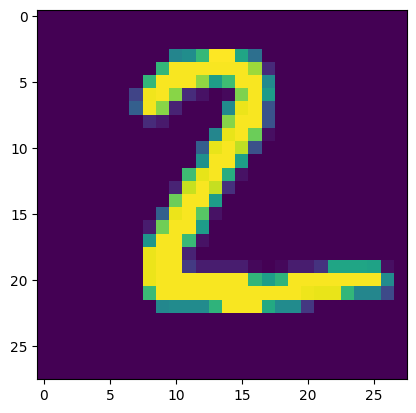

In [70]:
plt.imshow(x_test[1])
plt.show()

In [71]:
model.predict(x_test[1].reshape(1,28,28)).argmax(axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([2])

## Question:4 Next our task is to write a scratch code for a simple feed forward network that does a task. This model has inputs as [0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1] and the expected output as [0], [1], [1], [0] in each case. So there are three features in our dataset as you see above. The activation function is to be taken as sigmoid. The architecture is like we have only one hidden layer and an output layer with one neuron. Take the error function as (1/2)(y − yˆ)2

In [72]:
import numpy as np 

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid function
def sigmoid_derivative(x):
    return x*(1-x)

# mean squared error loss
def mse_loss(y_true,y_pred):
    return 0.5*np.mean((y_true-y_pred)**2)

# Input dataset (XOR gate inputs with bias term)

x = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

# output labels
y = np.array([[0],
              [1],
              [1],
              [0]])

# seed for reproducibility
np.random.seed(1)

# Initialize weights randomly with mean 0 
input_size = 3  # 3 input features
hidden_size = 2 # 2 hidden layers
output_size = 1 # 1 output neuron

# Weights
w1 = 2 * np.random.random((input_size, hidden_size))-1
w2 = 2 * np.random.random((hidden_size, output_size))-1

# Biases
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Learning rate 
lr = 0.1

# Training loop
for epoch in range(10000):
    
    ##------------- Forward pass -------------------
    a1 = np.dot(x,w1) + b1 
    h1 = sigmoid(a1)    # activation of hidden layer
    
    a2 = np.dot(h1,w2) + b2
    output = sigmoid(a2) # final prediction
    
    # loss calculation 
    loss = mse_loss(y,output)
    
    ##-------------- Back propagation ---------------
    # output layer error
    output_error = output - y 
    output_delta = output_error * sigmoid_derivative(output)
    
    ## hidden layer error
    hidden_error = np.dot(output_delta, w2.T)
    hidden_delta = hidden_error * sigmoid_derivative(h1)
    
    ##------------Updating weights and biases -----------
    w2 -= lr * np.dot(h1.T,output_delta)
    b2 -= lr * np.sum(output_delta, axis = 0, keepdims = True)
    
    w1 -= lr * np.dot(x.T, hidden_delta)
    b1 -= lr * np.sum(hidden_delta, axis = 0, keepdims = True)
    
    # Print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# --------- Final Output ---------
print("\nFinal predictions after training:")
print(output.round(3))
    

Epoch 0, Loss: 0.1267
Epoch 1000, Loss: 0.1215
Epoch 2000, Loss: 0.1029
Epoch 3000, Loss: 0.0905
Epoch 4000, Loss: 0.0828
Epoch 5000, Loss: 0.0433
Epoch 6000, Loss: 0.0105
Epoch 7000, Loss: 0.0049
Epoch 8000, Loss: 0.0031
Epoch 9000, Loss: 0.0022

Final predictions after training:
[[0.049]
 [0.945]
 [0.945]
 [0.071]]


In [73]:
y_pred_binary = (output > 0.5).astype(int)
print("Predicted labels:", y_pred_binary.ravel())
print("True labels:     ", y.ravel())

Predicted labels: [0 1 1 0]
True labels:      [0 1 1 0]
